In [ ]:
# 사용 데이터: AAME.csv
# LSTM ▶ 예측된 다음날 주가: 2.3464277
# RNN ▶ 예측된 다음날 주가: 2.1355004

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt

In [3]:
# CSV 파일 불러오기
df = pd.read_csv("/content/sample_data/AAME.csv", header=0)
data = df['Close'].values.reshape(-1, 1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [4]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
print(scaled)

[[0.22213181]
 [0.21887713]
 [0.22213181]
 ...
 [0.11017088]
 [0.10886899]
 [0.11147275]]


In [5]:
# 훈련 데이터와 테스트 데이터 분리
test_size = 200
train_data = scaled[:-test_size]
test_data = scaled[-test_size:]

def make_sample(date, window):
  train = []
  target = []
  for i in range(len(date) - window):
    train.append(date[i:i+window])
    target.append(date[i+window])
  return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [7]:
# LSTM 구축하기
model = Sequential()
model.add(SimpleRNN(16, input_shape=(X_train.shape[1], 1), activation='tanh', return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=16)

# 테스트셋을 이용하여 키래 주가 예측
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0390
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.9941e-04
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.7204e-04
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.5763e-04
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.4655e-04
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.8813e-04
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.6337e-04
Epoch 9/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.6600e-04
Epoch 10/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.3670e-04
Epoch 11/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.4048e-04
Epoch 12/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.3756e-04
Epoch 13/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.2314e-04
Epoch 14/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.1301e-04
Epoch 1

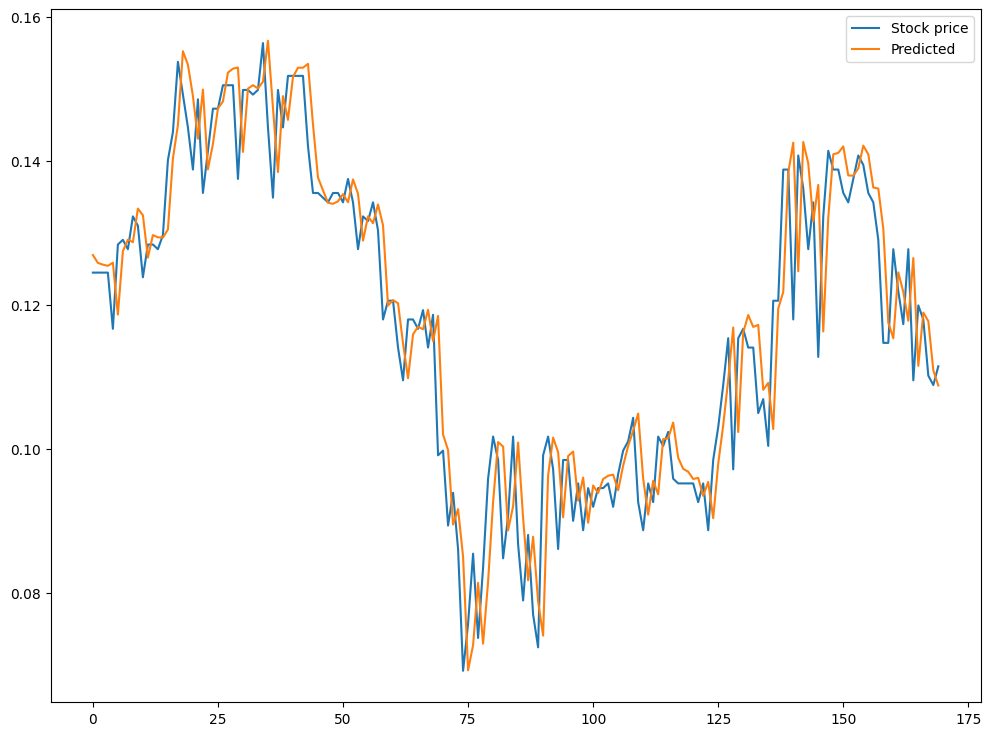

In [8]:
# 그래프 그리기
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='Stock price')
plt.plot(pred, label='Predicted')
plt.legend()
plt.show()

In [9]:
# 새로운 데이터로 예측

new_data = data[-30:]  # shape: (30, 1)
new_scaled = scaler.transform(new_data)

# 모델 입력 형태로 변환 (samples=1, time=30, features=1)
X_new = new_scaled.reshape(1, 30, 1)

# 예측
pred_scaled = model.predict(X_new)

# 스케일 복원
pred_actual = scaler.inverse_transform(pred_scaled)

print("▶ 예측된 다음날 주가:", pred_actual[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
▶ 예측된 다음날 주가: 2.1355004
